<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ارزش‌گذاری مشتریان
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font>
    در ادامه‌ی امور مربوط به بازاریابی، در این گام باید براساس ارزش مشتریان برای شرکت اقدام به گروه‌بندی آن‌ها کنید.
    برای این کار از یک روش معروف حوزه‌ی تحلیل رفتار مشتری با نام <a href="https://en.wikipedia.org/wiki/RFM_(market_research)"><i>RFM</i></a> استفاده خواهید کرد.
    در این روش برای هر مشتری سه معیار محاسبه می‌شود:
</font>
</p>


<div dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font>
    <ol>
        <li>
            <b>معیار <i>Recency</i> (ماندگاری):</b> تعداد روزی که از آخرین خرید مشتری می‌گذرد.
        </li>
        <li>
            <b>معیار <i>Frequency</i> (فرکانس):</b> تعداد دفعاتی که مشتری از ما خرید کرده است.
        </li>
        <li>
            <b>معیار <i>Monetary Value</i> (ارزش مالی):</b> مجموع درآمدی که شرکت از یک مشتری داشته است.
        </li>
    </ol>
</font>
</div>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font> 
این معیارها، نشان‌دهنده‌ی شاخص‌های مهمی در رفتار مشتریان هستند. به‌عنوان مثال، هرچه خرید جدیدتری توسط یک مشتری صورت گرفته باشد، احتمال آن‌که وی مجدد از ما خرید کند، افزایش می‌یابد. هرچه مشتری تعداد دفعات بیشتری خرید کند، به این معنی‌ست که مشتری رضایت بیشتری دارد و همچنین میزان درآمدی که یک مشتری برای شرکت تولید می‌کند، می‌تواند او را از سایر خریداران متمایز کند.
</font>
</p>


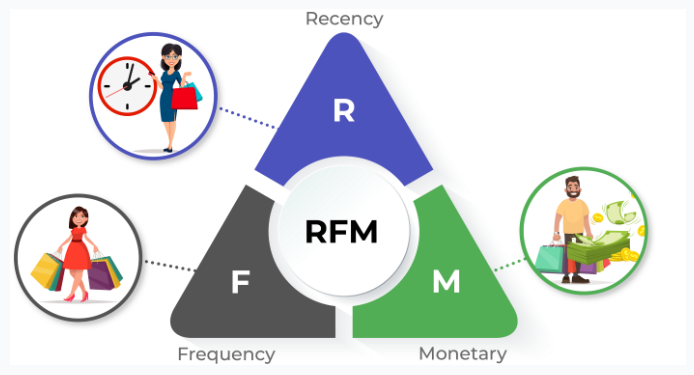

   
<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
کتابخانه‌ها
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
       ابتدا کتابخانه‌های مورد نیاز خود را فرا بخوانید.
</font>
</p>

In [1]:
import numpy as np
import pandas as pd

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    مجموعه‌داده
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    حال داده‌های پیش‌پردازش‌شده را که در گام اول پروژه در فایل <code>preprocessed_sales.csv</code> ذخیره کردید به شکل یک دیتافریم بخوانید.
</font>
</p>

In [2]:
df = pd.read_csv('../preprocessing-phase1/preprocessed_sales.csv')
df.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    معیار Recency
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    ابتدا نیاز است برای هر مشتری (<code>CustomerId</code>) معیار <i>Recency</i> را محاسبه کنید.
    برای این معیار باید تعداد روز گذشته از آخرین خرید کاربر نسبت به یک روز بعد از آخرین تاریخ موجود در مجموعه‌داده (ستون <code>InvoiceDate</code>) را محاسبه کنید. زیرا که فرض را بر آن گرفته‌ایم که شما در چنین روزی در حال تحلیل هستید.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    بنابراین ابتدا آخرین تاریخ موجود در مجموعه‌داده را پیدا کرده، و پس از جمع روز آن با <code>1</code>، حاصل را در متغیر <code>last_day</code> ذخیره کنید.
    مقدار این متغیر باید از نوع <code>Timestamp</code> باشد. به‌عنوان مثال اگر آخرین تاریخ معادل <code>Timestamp('2010-10-10 10:10:00')</code> بود، آن‌گاه حاصل شما باید به شکل <code>Timestamp('2010-10-11 10:10:00')</code> باشد.
</font>
</p>

In [3]:
last_day = pd.to_datetime(df['InvoiceDate'].max()) + pd.DateOffset(days=1)

last_day

Timestamp('2010-12-10 20:01:00')

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    اکنون می‌توانید به ازای هر مشتری، تاریخ آخرین خرید وی را پیدا کرده و تعداد روز گذشته از <code>last_day</code> را محاسبه کنید.
    <br>
    حاصل را در یک دیتافریم به نام <code>df_customer_segments</code> و با دو ستون <code>CustomerId</code> (شناسه‌ی مشتری) و <code>Recency</code> (مقدار ماندگاری محاسبه‌شده) ذخیره کنید.
</font>
</p>

In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df_customer_segments = df.groupby('CustomerId').agg(
    Recency=('InvoiceDate', lambda x: last_day - x.max())
).reset_index()

df_customer_segments.head()

,CustomerId,Recency
0,12346.0,165 days 06:08:00
1,12347.0,3 days 05:04:00
2,12348.0,74 days 05:02:00
3,12349.0,43 days 11:38:00
4,12351.0,11 days 04:38:00


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    معیار Frequency
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    اکنون باید محاسبه کنید هرکدام از مشتری‌ها تاکنون چند خرید <b>یکتا</b> داشته‌اند. حاصل را در ستونی به نام <code>Frequency</code> به دیتافریم <code>df_customer_segments</code> اضافه کنید.
</font>
</p>

In [5]:
df_customer_segments = pd.merge(
    df_customer_segments,
    df.groupby('CustomerId')['InvoiceNumber'].nunique().reset_index(name='Frequency'),
    on='CustomerId'
)

df_customer_segments.head()

,CustomerId,Recency,Frequency
0,12346.0,165 days 06:08:00,11
1,12347.0,3 days 05:04:00,2
2,12348.0,74 days 05:02:00,1
3,12349.0,43 days 11:38:00,3
4,12351.0,11 days 04:38:00,1


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    معیار Monetary Value
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    برای این معیار باید محاسبه کنید مجموع خرید هر مشتری چقدر بوده است؟ توجه داشته باشید که برای محاسبه‌ی دریافتی هر ردیف باید قیمت واحد (<code>UnitPrice</code>) را در تعداد آن (<code>Quantity</code>) ضرب کنید و از حاصل آن برای محاسبه‌ی مجموع خرید هر مشتری استفاده کنید.
     حاصل را در ستونی به نام <code>MonetaryValue</code> به دیتافریم <code>df_customer_segments</code> اضافه کنید.
</font>
</p>

In [6]:
df_cp = df.copy()

df_cp['Value'] = df_cp['UnitPrice'] * df_cp['Quantity']

df_customer_segments['MonetaryValue'] = df_cp.groupby('CustomerId')['Value'].sum().values

df_customer_segments.head()

,CustomerId,Recency,Frequency,MonetaryValue
0,12346.0,165 days 06:08:00,11,372.86
1,12347.0,3 days 05:04:00,2,1323.32
2,12348.0,74 days 05:02:00,1,222.16
3,12349.0,43 days 11:38:00,3,2671.14
4,12351.0,11 days 04:38:00,1,300.93


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    گروه‌بندی هر معیار
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    اکنون نیاز است هرکدام از این سه معیار را براساس چارک اول،‌ دوم و سوم به شکل زیر به ۴ گروه مختلف تقسیم کنید
    (برای یادآوری مفهوم چارک،
    <a href="https://fa.wikipedia.org/wiki/%DA%86%D8%A7%D8%B1%DA%A9_(%D8%A2%D9%85%D8%A7%D8%B1)">این مطلب</a>
    را از ویکی‌پدیای فارسی بخوانید).
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| <b>شماره گروه</b> | <b>شرط</b> |
| :---: | :---: | 
| 1 | <code dir=ltr>value <= Q1</code> | 
| 2 | <code dir=ltr>Q1 < value <= Q2</code> | 
| 3 | <code dir=ltr>Q2 < value <= Q3</code> | 
| 4 | <code dir=ltr>Q3 < value</code> | 

</font>
</div>
</center>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    به ازای هر کدام از این سه معیار چنین کاری را انجام داده و نتایج را در سه ستون دیگر به نام‌های
    <code>F_quartile</code>، <code>R_quartile</code> و <code>M_quartile</code>
    ذخیره کنید.
    توجه کنید که مقادیر این ستون‌ها معادل شماره گروه یعنی اعداد <code>1</code> تا <code>4</code> خواهد بود.
</font>
</p>

In [7]:
grouping_labels = ['1', '2', '3', '4']

recency_data = {
    'min_recency': df_customer_segments['Recency'].min(),
    'Q1_recency': df_customer_segments['Recency'].quantile(0.25),
    'Q2_recency': df_customer_segments['Recency'].quantile(0.5),
    'Q3_recency': df_customer_segments['Recency'].quantile(0.75),
    'max_recency': df_customer_segments['Recency'].max()
}

frequency_data = {
    'min_frequency': -np.inf,
    'Q1_frequency': df_customer_segments['Frequency'].quantile(0.25),
    'Q2_frequency': df_customer_segments['Frequency'].quantile(0.5),
    'Q3_frequency': df_customer_segments['Frequency'].quantile(0.75),
    'max_frequency': np.inf
}

monetary_value_data = {
    'min_monetary_value': -np.inf,
    'Q1_monetary_value': df_customer_segments['MonetaryValue'].quantile(0.25),
    'Q2_monetary_value': df_customer_segments['MonetaryValue'].quantile(0.5),
    'Q3_monetary_value': df_customer_segments['MonetaryValue'].quantile(0.75),
    'max_monetary_value': np.inf
}

df_customer_segments['R_quartile'] = pd.cut(df_customer_segments['Recency'], bins=recency_data.values(), labels=grouping_labels)
df_customer_segments['F_quartile'] = pd.cut(df_customer_segments['Frequency'], bins=frequency_data.values(), labels=grouping_labels)
df_customer_segments['M_quartile'] = pd.cut(df_customer_segments['MonetaryValue'], bins=monetary_value_data.values(), labels=grouping_labels)

df_customer_segments.head()

,CustomerId,Recency,Frequency,MonetaryValue,R_quartile,F_quartile,M_quartile
0,12346.0,165 days 06:08:00,11,372.86,4,4,2
1,12347.0,3 days 05:04:00,2,1323.32,1,2,3
2,12348.0,74 days 05:02:00,1,222.16,3,1,1
3,12349.0,43 days 11:38:00,3,2671.14,2,3,4
4,12351.0,11 days 04:38:00,1,300.93,1,1,1


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    معیار RFM
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    اکنون می‌توانید با کنار هم قرار دادن مقادیر ستون‌های
    <code dir=ltr>[R_quartile, F_quartile, M_quartile]</code>
    مقدار نهایی <i>RFM</i> را محاسبه کرده و در ستونی به همین نام ذخیره کنید.
    به‌‌عنوان مثال اگر مقادیر این ستون‌ها برای یک مشتری برابر
    <code dir=ltr>[1, 2, 3]</code> بود،
    آن‌گاه مقدار نهایی <i>RFM</i> برابر با <code>123</code> است.
</font>
</p>

In [8]:
df_customer_segments['RFM'] = df_customer_segments[['R_quartile', 'F_quartile', 'M_quartile']].astype(str).apply(''.join, axis=1)
df_customer_segments.head()

,CustomerId,Recency,Frequency,MonetaryValue,R_quartile,F_quartile,M_quartile,RFM
0,12346.0,165 days 06:08:00,11,372.86,4,4,2,442
1,12347.0,3 days 05:04:00,2,1323.32,1,2,3,123
2,12348.0,74 days 05:02:00,1,222.16,3,1,1,311
3,12349.0,43 days 11:38:00,3,2671.14,2,3,4,234
4,12351.0,11 days 04:38:00,1,300.93,1,1,1,111


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    گروه‌بندی مشتریان
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    حال باید براساس مقادیر ستون <code>RFM</code> و طبق جدول زیر به گروه‌بندی مشتریان بپردازید و نام گروه آن‌ها را در ستونی به نام <code>Segment</code> ذخیره کنید.
    توجه داشته باشید که در این جدول، <code>X</code> به معنی هر مقداری است. به‌عنوان مثال <code>14X</code> به معنی <code>141</code>، <code>142</code>، <code>143</code> و <code>144</code> است.
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| <b>Segment</b> | <b>RFM</b> |
| :---: | :---: | 
| Best | <code dir=ltr>144</code> | 
| AlmostLost | <code dir=ltr>344</code> | 
| LostBigSpenders | <code dir=ltr>444</code> | 
| LostCheap | <code dir=ltr>441</code> | 
| Loyal | <code dir=ltr>X4X</code> | 
| BigSpenders | <code dir=ltr>XX4</code> | 

</font>
</div>
</center>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    <span style="color:purple"><b>نکته ۱:</b></span>
    در صورتی‌که یک مشتری در هیچ‌یک از گروه‌های جدول قرار نگرفت، گروه او را Normal اعلام کنید.
    <br>
    <span style="color:purple"><b>نکته ۲:</b></span>
    همچنین اگر یک RFM می‌تواند در دو گروه از جدول قرار بگیرد، اولویت با گروهی‌ست که در جدول، <b>بالاتر</b> آمده باشد.
</font>
</p>

In [9]:
import re

def group_rfm(rfm: str):
    loyal_pattern = '.4.'
    big_spenders_pattern = '..4'

    if rfm == '144':
        return 'Best'
    elif rfm == '344':
        return 'AlmostLost'
    elif rfm == '444':
        return 'LostBigSpenders'
    elif rfm == '441':
        return 'LostCheap'
    elif re.match(loyal_pattern, rfm):
        return 'Loyal'
    elif re.match(big_spenders_pattern, rfm):
        return 'BigSpenders'
    else:
        return 'Normal'


In [10]:
df_customer_segments['Segment'] = df_customer_segments['RFM'].astype(str).apply(group_rfm)
df_customer_segments.head()

,CustomerId,Recency,Frequency,MonetaryValue,R_quartile,F_quartile,M_quartile,RFM,Segment
0,12346.0,165 days 06:08:00,11,372.86,4,4,2,442,Loyal
1,12347.0,3 days 05:04:00,2,1323.32,1,2,3,123,Normal
2,12348.0,74 days 05:02:00,1,222.16,3,1,1,311,Normal
3,12349.0,43 days 11:38:00,3,2671.14,2,3,4,234,BigSpenders
4,12351.0,11 days 04:38:00,1,300.93,1,1,1,111,Normal


<div dir="rtl" align="right">

<h3>چگونه مقادیر ستون Recency را محاسبه کنم؟</h3>
<p>کافیست به ازای هر مشتری (<code>CustomerId</code>) تاریخ آخرین خرید وی را پیدا کنید (مثلاً به کمک ماکزیمم گرفتن از ستون <code>InvoiceDate</code> خریدهای شخص)، سپس این تاریخ را از <code>last_day</code> کم کنید و تعداد روزهای این اختلاف را بشمارید.</p>
<p>به‌عنوان مثال فرض کنید که <code>last_day</code> برابر <code>Timestamp('2010-10-11 10:10:00')</code> باشد و تاریخ آخرین خرید مشتری نیز <code>Timestamp('2010-10-09 12:20:00')</code> باشد. در این‌صورت اختلاف آن‌ها 1 روز و 21:50:00 ساعت خواهد بود، که اگر تنها روز را نگه داریم اختلاف آن‌ها 1 خواهد شد.</p>
<p>همان‌طور که در این مثال دیدید، در نظر گرفتن ساعت نیز بسیار اهمیت دارد و نباید تنها خود بخش تاریخ را از همدیگر کم کنید.</p>

<h3>چگونه به کمک چارک‌ها هر معیار را گروه‌بندی کنم؟</h3>
<p>فرض کنید در حال گروه‌بندی معیار <code>Recency</code> هستیم و چارک اول، دوم و سوم آن را محاسبه کرده‌ایم. حال می‌توانیم گروه <code>Recency</code> را طبق جدول محاسبه کنیم. به‌عنوان مثال اگر مقدار <code>Recency</code> یک مشتری برابر 165 باشد و این مقدار از چارک سوم بیشتر باشد، طبق جدول، شماره‌ی گروه آن 4 خواهد بود و کافیست در ستون <code>R_quartile</code> این ردیف مقدار 4 را قرار دهیم.</p>

<h3>در مورد ستون Frequency به این نکته دقت کنید که:</h3>
<p>توجه داشته باشید که در این قسمت برای هر مشتری باید تعداد سفارش یکتا را محاسبه کنید. بنابراین اگر در راه‌حل خود از <code>()count</code> استفاده کرده‌اید باید آن را به <code>()nunique</code> تغییر دهید.</p>

<h3>در هنگام گروه بندی مشتریان به نکات زیر دقت کنید:</h3>
<p>در این قسمت به ترتیب شرط‌های نوشته شده توجه داشته باشید. پیشنهاد می‌کنیم که یک تابع بنویسید که یک لیست از مقادیر <code>RFM</code> را گرفته و به ازای هرکدام از این مقادیر به‌ترتیب هرکدام از شرط‌ها را بررسی کرده و خروجی موردنظر را تولید کند. به‌عنوان مثال:</p>
<div dir="ltr" align="left">
<pre><code class="python">
def group_rfm(input):
    output = []
    for i in input:
        if i == 144:
            output.append('Best')
        # To-Do
</code></pre>
</div>
<div dir="rtl" align="right">
<p>حال کافیست مقادیر ستون <code>RFM</code> را به این تابع بدهید تا خروجی موردنظر تولید شود و در ستون <code>Segment</code> ذخیره کنید. البته می‌توانید این تابع را برای یک ورودی تکی (و نه یک لیست) نیز نوشته و از توابع پانداز جهت اجرای تابع روی مقادیر ستون موردنظر استفاده کنید.</p>

<p>جهت اطمینان از این‌که تابع شما به درستی کار می‌کند می‌توانید چند مقدار مختلف به آن ورودی دهید و بررسی کنید که آیا تمام حالت‌های جدول را به‌درستی پوشش می‌دهد یا خیر.</p>

</div>
